## Final Project Submission
LOOK UP EXAMPLE NOTEBOOKS IN DATA SCIENCE (EDA, ECPLORATORY DATA ANALYSIS), look up how to make jupyter notebooks look nice

Look up all these datasets and get as much existing information from them as you can.

Go through comments in code and see what comments would be better as Markdown. Anything excess can be used in your blog post!

insert function you wrote in other project here, write a funxtion for dropping columns given col name?

Please fill out:
* Student name: Telayna Wong
* Student pace: self paced
* Scheduled project review date/time: 1/14/2021, 10:30 AM (Alaska)
* Instructor name: Jeff Herman
* Blog post URL:


IMDB DATA SET: A ‘\N’ is used to denote that a particular field is missing or null for that title/name. 



**DELETE B4 TURNING IN**

* "How did you pick the question(s) that you did?" - I decided to use ratings because I am interested in what the public thoughts align to box office success
* "Why are these questions important from a business perspective?" - genre gives us a broad overview of where Microsoft can look, ratings give us ideas about 
* "How did you decide on the data cleaning options you performed?"
* "Why did you choose a given method or library?" - I used both matpliotlib and seaborn to try to have visualizations with different styles to appeal to a wide range of audiences
* "Why did you select those visualizations and what did you learn from each of them?"- 
* "Why did you pick those features as predictors?" - I thought looking at "successful" genres in terms of revenue would give a nice broad overview of where Microsoft should start focusing their energies on movie planning.
* "How would you interpret the results?"
* "How confident are you in the predictive quality of the results?" - i feel confident in that I pulled from several different datasets that are created by the top movie databases. If you use movie ratings from users, then I do feel like I am getting a good survey from the population since these are huge websites.
* "What are some of the things that could cause the results to be wrong?" - if you used ratings/critics, it is really hard to say whether these people represent the population at large. And we don't know how much money was spent on advertising, and what methods of advertisting were used. 

# Table of Contents

MAKE THIS MORE DETAILED, with specific contents in each section?
- <a href='#Questions'>Questions</a>
- <a href='#Exploring the Data'>Data Exploration</a>
- <a href='#Data Cleaning'>Data Cleaning</a>
- <a href='#Visualizations'>Visualizations</a>
- <a href='#Business Recommendations'>Business Recommendations</a>
- <a href='#Future Work'>Future Work</a>

<a id='Questions'></a>
## Questions

The overall goal of the below analysis is to steer Microsoft in the right direction as they make their bold leap into the movie making business--how can Microsoft create the most revenue from movies?

To inform this question, I examine the following research questions:

* Which genres gross the most domestically vs internationally?
* How does release date factor into box office revenue? Is there a seasonal component to revenue?
* How do film ratings from online users impact box office success? Do high ratings = high movie revenue? Maybe compare to critic reviews. Can we trust the critics? OR maybe just look at what the critics do.


In [91]:
# Import required libraries 
import numpy as np
import pandas as pd
import datetime # take out if not used

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns # REMEMBER TO TAKE OUT IF YOU DECIDE NOT TO USE SEABORN

 <a id='Exploring the Data'></a>

## Exploring the Data

I have the following datasets at my disposal:

From Box Office Mojo:
* bom.movie_gross.csv.gz

From IMDB:
* imdb.name.basics.csv.gz
* imdb.title.akas.csv.gz
* imdb.title.basics.csv.gz
* imdb.title.crew.csv.gz
* imdb.title.principals.csv.gz
* imdb.title.ratings.csv.gz

From Rotten Tomatoes:
* rt.movie_info.tsv.gz
* rt.reviews.tsv.gz

TheMovieDB.org
* tmdb.movies.csv.gz
* tn.movie_budgets.csv.gz

_Right off the bat_, I know I want to take a look at **bom.movie_gross.csv.gz** and **tn.movie_budgets.csv.gz** to figure out movie revenues.

To get information on ratings from users and critics I will also probably look at **imdb.title.ratings.csv.gz** and **rt.reviews.tsv.gz**.

Let's now read in data files and start cleaning them up. I will assign variables to each dataset so I can preprocess them easier.


In [92]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Get information on each column's data types and data value counts as a starting point for cleaning
bom_movie_gross.info()

# How will you id movies other than title? how will you do this in a smart way?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [93]:
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Also, let's take a look at what time period this dataset covers.

In [94]:
bom_movie_gross['year'].describe()

count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

This dataset only covers 8 years, so that is something to keep in mind for analysis. I will also want to check the range of years on the other dataset with domestic and foreign gross information.

From this initial information on the 'bom_movie_gross' dataset, I see that I need to do the following cleanup steps:

* Convert 'foreign_gross' to float64 data type like 'domestic_gross.' - DONE
* Deal with missing values from 'foreign_gross' - I might want to use another dataset for foreign gross values. See if I can grab these values from tn.movie_budgets.csv.gz
* Drop the 'studio' column as it is not relevant to any of my research questions. - DONE 
* Convert 'year' to the 'datetime64' data type. This will allow me to more easily create a time series plot. -- DO I NEED THIS?


## Let's Clean Up the Data

Starting with 'bom_movie_gross'...

In [95]:
# Not gonna use studio data, so will drop this column.
dropped_bom_movie_gross = bom_movie_gross.drop(['studio'], axis = 1)
dropped_bom_movie_gross

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


Check for null values in 'domestic gross' and 'foreign gross'. So that we can check this in our multiple data files, let's define a function to check for missing data.

In [96]:
# Function checks for missing values in a user specified column of a dataframe.
def missing_val_check(data, col_name):
    print("nulls in " + col_name + ":")
    display(data[col_name].isnull().sum())

In [97]:
missing_val_check(dropped_bom_movie_gross, 'domestic_gross')

nulls in domestic_gross:


28

In [98]:
missing_val_check(dropped_bom_movie_gross, 'foreign_gross')

nulls in foreign_gross:


1350

I cannot reasonably impute missing foreign and domestic gross values for movies, so I will have to drop these null values. Let's do this drop in place, right in the dataset.

In [99]:
dropped_bom_movie_gross.dropna(inplace=True)

Let's double check that dropping our nulls worked.

In [100]:
dropped_bom_movie_gross.isnull().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Let's fix our data types so that we can further work with them.

In [101]:
# Don't know if I need to change to datetime...
# Change (in place) year to 'datetime64' data type.
pd.to_datetime(dropped_bom_movie_gross['year'])

# Before I can change foreign_gross values to floats, I have to remove any commas or alphanumeric characters.
# Let's do both the character removal and datatype conversion in one line of code!
dropped_bom_movie_gross['foreign_gross'] = dropped_bom_movie_gross['foreign_gross'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)


Let's check for repeat movie titles to ensure there are not duplicates in the dataset.

In [102]:
# Check for duplicate values in the column 'title'
dropped_bom_movie_gross.title.duplicated().any()

False

Nice, looks like there are not repeats of movie titles, but it will be important to check that there are not repeats that are hiding within strange formatting. --- MAYBE TAKE THIS OUT ?????? 

I want to have a visualization of movie revenue by genre (foreign vs. domestic), so I will take a closer look at these columns?

In [103]:
print(dropped_bom_movie_gross.shape)

(2009, 4)


In [104]:
dropped_bom_movie_gross['domestic_gross'].describe()
# bom_movie_gross['domestic_gross'].quantile(q=.75)

count    2.009000e+03
mean     4.697311e+07
std      8.159966e+07
min      4.000000e+02
25%      6.650000e+05
50%      1.650000e+07
75%      5.600000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [105]:
# Not sure if you will need the code below, as you are going to make a histogram that will auto bin for you anyway.
# pd.qcut(dropped_bom_movie_gross['domestic_gross'],q=4).value_counts()

In [106]:
dropped_bom_movie_gross['foreign_gross'].describe()
# What are the currenciges used in 'foreign_gross', and is this column additive, or completely separate from 'domestic_gross'?

count    2.009000e+03
mean     7.571822e+07
std      1.381297e+08
min      1.010000e+00
25%      3.900000e+06
50%      1.930000e+07
75%      7.590000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

Not sure if I will use the dataframe above anymore. Maybe take out unless you scrape some budget data for these movies.

In [107]:
# Read in data files. Not gonna use this file--maybe take out nb?
# imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
# match up with 'nconst' column in pd.read_csv('zippedData/imdb.title.crew.csv.gz'). Try locating the same value of nconst.
# 'birth_year' and 'death_year' seem to be missing a lot of values, and I'm not sure how this dataset will be helpful to my research questions. I will drop these.
# imdb_name_basics.info()

In [108]:
# Read in data file - This is the original file
# Not sure if I'll use this data file either. 
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_akas
# imdb_title_akas.types.unique()
# Add up all the different occurences of each movie by summing occurences of title id. But is this necessary?

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [109]:
imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


The languages, attributes, region, and types columns are missing many values and don't seem to be useful for my analysis, so I will drop them.

The data types of the columns I am intending to keep already look correct.

In [110]:
imdb_title_akas_dropped = imdb_title_akas.drop(['attributes','language','region','types'], axis = 1)
imdb_title_akas_dropped

,title_id,ordering,title,is_original_title
0,tt0369610,10,Джурасик свят,0.0
1,tt0369610,11,Jurashikku warudo,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,13,O Mundo dos Dinossauros,0.0
4,tt0369610,14,Jurassic World,0.0
...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,1.0
331699,tt9827784,3,Farewell Song,0.0
331700,tt9880178,1,La atención,1.0
331701,tt9880178,2,La atención,0.0


In [111]:
imdb_title_akas_dropped.dropna(inplace=True)

In [112]:
# Let's see how many of the movies listed here are original titles vs. adaptations
imdb_title_akas_dropped['is_original_title'].isin(['1.0']).sum()
# I see that this dataset has a lot of duplicates --- > maybe take this comment out

44700

From 'imdb.title.basics.csv.gz' I will obtain movie genre information for my analysis.

In [113]:
# Read in data file
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz') 
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [114]:
# Drop runtime_minutes column, as it is not pertinent to any of our research questions and has quite a few missing values.
imdb_title_basic_dropped = imdb_title_basics.drop(['runtime_minutes'], axis = 1)

Let's check that the data types in this file are appropriate, as well as consider whether there are missing values.

In [115]:
imdb_title_basic_dropped.info()
# match up with file 'zippedData/imdb.title.principals.csv.gz' via tconst column
# and 'imdb_title_akas' to isolate genres.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          146144 non-null  object
 1   primary_title   146144 non-null  object
 2   original_title  146123 non-null  object
 3   start_year      146144 non-null  int64 
 4   genres          140736 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.6+ MB


We cannot reasonably impute missing genres or original_titles, so these will need to be dropped. Let's drop the values in place so we don't have to work with a new dataframe.

In [116]:
imdb_title_basic_dropped.dropna(how='any', inplace=True)

In [117]:
# Read in data files
# pd.read_csv('zippedData/imdb.title.crew.csv.gz')

I will not be using this dataset because I am not planning on looking at writers or directors.

In [118]:
# Read in data files
# pd.read_csv('zippedData/imdb.title.principals.csv.gz')
# I will not be using this dataset, because it doesn't answer any of my research questions.

In [119]:
# Read in the tab separated file (.tsv)
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [120]:
display(rt_movie_info)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


From a quick glance at this dataset, I might want to get rid of the existing index and put id there instead.

I might want to drop the 'synopsis', 'rating', 'director', 'writer', 'studio', and 'runtime' columns, as they don't add any information to my research questions.

MAYBE MOVE THIS NOTE TO THE VISUALIZATIONS SECTION OF NOTEBOOK: For my release month time series (is this technically a time series?), I will want to reformat the theater_date column so that I can pick out just the month.

I might want to filter the currency column just by '$'.

Lots of NaNs to drop.

Need to pull reformat genre column so that I can pick out individual genres.



In [121]:
# Read in the tab separated file (.tsv).
# Include encoding argument to get around encoding warning
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')

In [122]:
display(rt_reviews)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Let's check our datatypes and value counts.

In [123]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Let's drop our null values and unneeded columns to make this datafile easier to read.

In [124]:
rt_reviews.drop(columns=["fresh", "publisher", "review"])

,id,rating,critic,top_critic,date
0,3,3/5,PJ Nabarro,0,"November 10, 2018"
1,3,NaN,Annalee Newitz,0,"May 23, 2018"
2,3,NaN,Sean Axmaker,0,"January 4, 2018"
3,3,NaN,Daniel Kasman,0,"November 16, 2017"
4,3,NaN,NaN,0,"October 12, 2017"
...,...,...,...,...,...
54427,2000,NaN,Laura Sinagra,1,"September 24, 2002"
54428,2000,1/5,Michael Szymanski,0,"September 21, 2005"
54429,2000,2/5,Emanuel Levy,0,"July 17, 2005"
54430,2000,2.5/5,Christopher Null,0,"September 7, 2003"


In [125]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [126]:
# Figure out which columns have nulls.
rt_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [127]:
# I think I might need to change dtype of rating to get averages.

From a quick glance at this dataset, I might want to get rid of the existing index and put id there instead.

There are lots of critics listed here, so I might want to look at specifically the top critics.

Are the critic ratings listed here on the same scale as the user ratings from IMDB?

Might want to drop the fresh, publisher, review, and date columns.

In [128]:
# Read in data files
df_tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
# need to remove unnamed:0 column
df_tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [129]:
# Read in data files
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
# does the id in this dataset match up with 'tmdb.movies.csv.gz'- maybe sort by ids on the other dataset to check
# I will have to remove the $ symbols from the last 3 columns and reformat the date
display(movie_budgets)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


movie_budgets contains the movie names that I can match up to other datasets, release_date, and revenue data (if I subtract production_budget from gross columns).


In [130]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [131]:
# REMOVE B4 SUBMITTING # Do I need to change 'release_date' to a diff data type?

Let's remove the $ and comma signs from 'production_budget', 'domestic_gross', and 'worldwide_gross,' as well as change these data types to float so that we can work with the data numerically.

In [132]:
# FIX THIS THIS DOES NOT WORK YET. Is the function formatted correctly?

def numericalize_my_numbers(df, col_name):
    df[col_name] = df[col_name].str.replace(',','').str.replace('$','').astype(float)
    return df[col_name]


In [133]:
numericalize_my_numbers(movie_budgets, "production_budget")
numericalize_my_numbers(movie_budgets, "domestic_gross")
numericalize_my_numbers(movie_budgets, "worldwide_gross")

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

Let's double check that the above columns were changed to float data types.

In [134]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Now that we have the correct data types for our money columns, let's create a new column called 'revenue' by subtracting 'production_budget' from 'domestic_gross' and 'worldwide_gross.'

I might want to separate our worldwide and domestic revenues in case I would like to show this breakdown on my visualization of revenue vs. release_date

In [135]:
movie_budgets['domestic_revenue'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

In [136]:
movie_budgets['worldwide_revenue'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

I want to now extract the release month from the 'release_date' column. In case I need the full release dates to match this dataframe up with another, I will not overwrite the original content in 'release_date.'

But first, I want to have the release months displayed in calendar year order on my visualization, so I will now convert the 'release_date' column to the datetime data type so that I can then sort the column.

In [144]:
# Convert 'release_date' to a datetime object

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [145]:
# Sort the 'release_date' column

movie_budgets = movie_budgets.sort_values(by='release_date')

In [139]:
# Let's check that the datetime conversion and sorting worked.

movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue
5677,78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,9890000.0,10890000.0
5523,24,1916-09-05,Intolerance,385907.0,0.0,0.0,-385907.0,-385907.0
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,7800000.0,7800000.0
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,2900000.0,2900000.0
5606,7,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,10755000.0,21755000.0


Now that 'release_date' is properly coded as datetime objects and is sorted, let's define a new 'release_month' column in our dataframe.

At first, I was thinking of using string slicing to grab the month from each entry in the 'release_date' column, but there is a much easier way to retrieve this information from datetime objects.

In [143]:
# CAN PROBABLY TAKE THIS OUT. movie_budgets['release_month'] = movie_budgets['release_date'].str.slice(0,3)

# CODE NOT WORKING RIGHT NOW, CAN PROBABLY TAKE OUT. movie_budgets['release_month'] = pd.DatetimeIndex(movie_budgets['release_month']).month
movie_budgets['release_month'] = movie_budgets['release_date'].astype('datetime64[M]')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,release_month
5677,78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,9890000.0,10890000.0,1915-02-01
5523,24,1916-09-05,Intolerance,385907.0,0.0,0.0,-385907.0,-385907.0,1916-09-01
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,7800000.0,7800000.0,1916-12-01
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,2900000.0,2900000.0,1920-09-01
5606,7,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,10755000.0,21755000.0,1925-11-01


In [67]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_revenue,worldwide_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec,303181382.0,9.997217e+08


Just when I thought that I had all my data types figured out correctly, I realized that I should convert 'release_month' to the datetime data type.

??? Let's combine the 'movie_budgets' dataframe with the first dataframe we looked at,

By combining our variables of interest into one new dataset, we simplify our analysis and visualization process. Let's do that now.

In [64]:
combined_df = 
combined_df

SyntaxError: invalid syntax (<ipython-input-64-261e1923f53d>, line 1)

As a reminder, one of my research questions was "Which genres gross the most domestically vs internationally?"

To take a look at this, I need to clean up my 'genres' column.

I see from a preview of the combined_df above that I have movies with more than one genre listed. This will make analysis difficult--what I need to do is separate each genre into one row for that movie (with indexing preserved). I can do this with the explode() function.

In [65]:
exploded_df = combined_df.explode('genres')

NameError: name 'combined_df' is not defined

## Visualizations

Now that the data are all cleaned and properly formatted in the correct data types, let's create some helpful visualizations to answer our questions.

My first visualization will be of movie genre vs. movie revenue, as that is my first and broadest research question.

I want to plot mean and median revenue for comparison.

******* REMOVE B4 SUBMITITNG: 5? different meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)

In [ ]:
# Bar graph showing genres on x-axis and movies grossing over ... (look at the statistics on available data to determine the best separation)
# Look at code here: https://benalexkeen.com/bar-charts-in-matplotlib/
plt.style.use('ggplot')

genres = exploded_df['genres']
movies_over_ =
# variance = 

genre_pos = [i for i, _ in enumerate(genres)]

# Plot bar chart with error bars included (uncomment yerr if you want to use error. Gotta figure out where to get variance vals first)
plt.bar(genre_pos, movies_over_, color='purple', #yerr=variance)
plt.xlabel('Genre')
plt.ylabel('# of Movies with Revenue Over X')
plt.title('Movies with Revenue Over X by Genre (Domestic vs International)'')
plt.legend(loc='upper right')
plt.xticks(genre_pos, genres)

# Rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

<BarContainer object of 5782 artists>

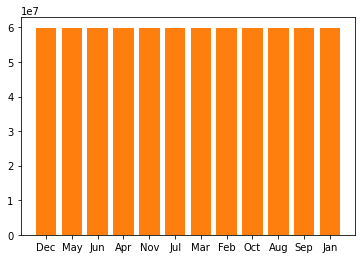

In [66]:
# Plot mean and median worlwide revenue and mean and median domestic revenue with release months on the X axis.

# Group the data by release month.

revenue_release_month_mean=movie_budgets.groupby('release_month').mean() 
revenue_release_month_med=movie_budgets.groupby('release_month').median()

# Sort the columns by month so that the 

n = 12 

# You may need to use groupby first before this will work
release_month = movie_budgets['release_month']
domestic_rev = movie_budgets['domestic_revenue']
worldwide_rev = movie_budgets['worldwide_revenue']

# We want 12 x ticks to represent each month of the year
ind = np.arange(n) 

# Width is used to add a space buffer between the y-axis and the first data column on the bar plot.
# width = .35 
plt.bar(release_month, domestic_rev)
plt.bar(release_month, worldwide_rev)

plt.ylabel('Revenue') # in what currency and in what units (millions of dollars?)
plt.xticks()
plt.title('Domestic and Worldwide Revenue by Release Month')
plt.legend(loc='best')
plt.show()
# Plot median worlwide revenue and median domestic revenue with release months on the X axis.



In [ ]:
# Critics plot



<a id='Business Recommendations'></a>

## Business Recommendations

* The highest grossing genres appeared to be
* Release month does not seem to be a statistically important factor for Microsoft to consider. There are better qualities of box office successes to pick out!
* User reviews vs. critic reviews conclusion.

<a id='Future Work'></a>

## Future work

* In this analysis, I looked at data from the past x years (up to 2018?) with these datasets. It would be helpful to scrape more recent data from 2019.

* I did not account for advertising costs, which would help us better quantify revenue.

* Now that I have identified some of the key characteristics of movies that produce the most revenue, I would like to take a deeper look at which kind of customers to target movies toward by performing a market segmentation with clustering techniques.